In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import time
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
df = pd.read_table("babyboom.dat.txt",header=None,sep="\s+"
                  ,names=["24time","sex","weight","minute"])

In [5]:
df

,24time,sex,weight,minute
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [6]:
 df.mean()

24time    1296.000000
sex          1.590909
weight    3275.954545
minute     788.727273
dtype: float64

In [7]:
df.corr()

,24time,sex,weight,minute
24time,1.000000,0.028027,0.075636,0.999840
sex,0.028027,1.000000,0.228751,0.031815
weight,0.075636,0.228751,1.000000,0.079616
minute,0.999840,0.031815,0.079616,1.000000


In [8]:
df.corr(method='spearman')

,24time,sex,weight,minute
24time,1.000000,0.032762,0.024596,1.000000
sex,0.032762,1.000000,0.143794,0.032762
weight,0.024596,0.143794,1.000000,0.024596
minute,1.000000,0.032762,0.024596,1.000000


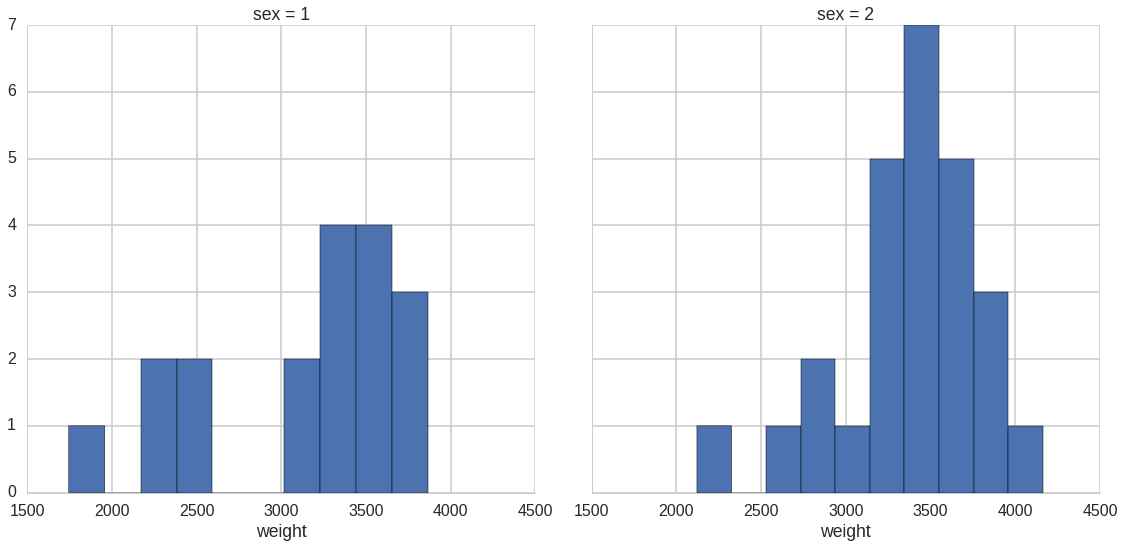

In [25]:
g = sns.FacetGrid(col="sex", data=df, size=8)
g.map(plt.hist, "weight")

In [29]:
f = lambda x,l:l*np.exp(-l*x)*(x>0)

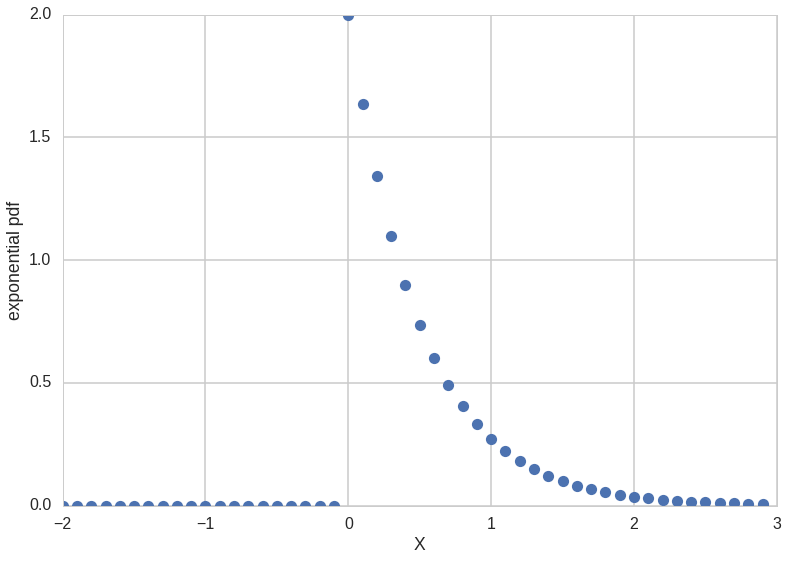

In [37]:
xpts = np.arange(-2,3,0.1)
plt.plot(xpts,f(xpts,2),'o')
plt.xlabel("X")
plt.ylabel("exponential pdf")

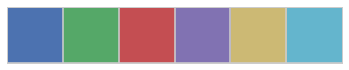

In [49]:
from scipy.stats import expon

x = np.linspace(0,4, 100)
colors=sns.color_palette()
sns.palplot(colors)

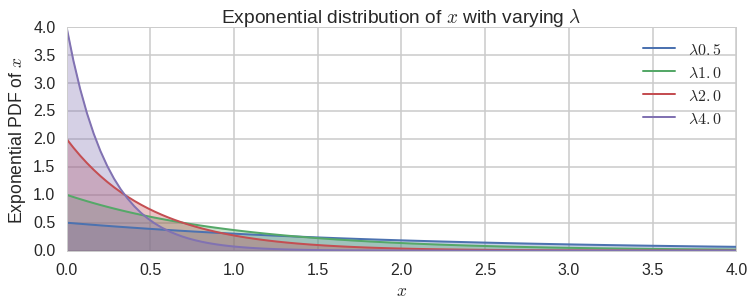

In [89]:
lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda %.1f$"%l)
    plt.fill_between(x,expon.pdf(x,scale=1./l),color=c,alpha=0.33)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Exponential PDF of $x$")
plt.title("Exponential distribution of $x$ with varying $\lambda$")


In [106]:
x = np.linspace(0,4, 100)
expon.pdf(x).sum()


24.809151001568988

In [75]:
s = "%.1f this %.2f"%(0.0002,0.2)
s

'0.0 this 0.20'

Plot some random numbers from the same distribution along with the curve

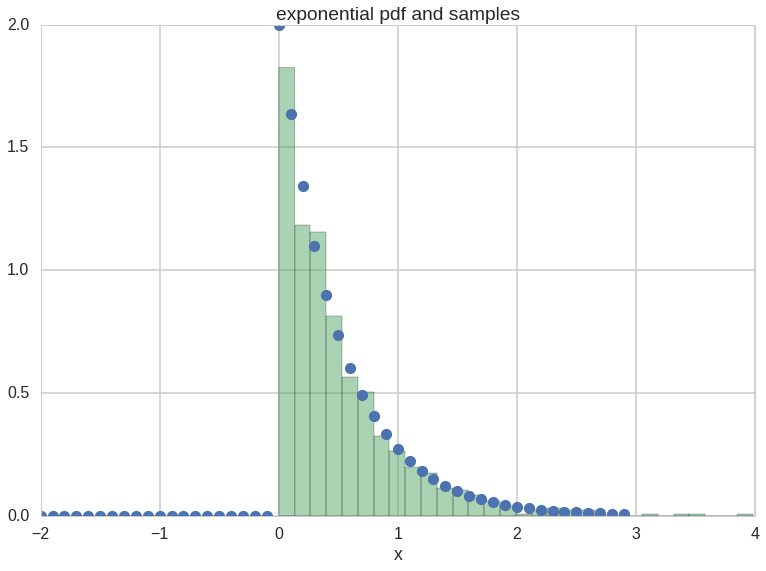

In [113]:
from scipy.stats import expon
plt.plot(xpts,expon.pdf(xpts,scale=1./2.),'o')
plt.hist(expon.rvs(size=1000,scale=1./2.),normed=True,alpha=0.5,bins=30)
plt.xlabel('x')
plt.title('exponential pdf and samples')

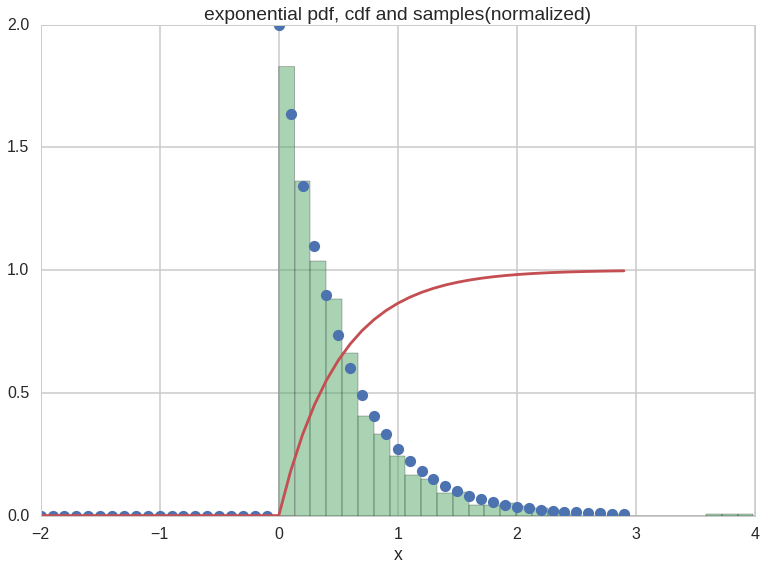

In [114]:
rv = expon(scale=0.5)
plt.plot(xpts,rv.pdf(xpts),'o')
plt.hist(rv.rvs(size=1000), normed=True, alpha=0.5, bins=30);
plt.plot(xpts, rv.cdf(xpts));
plt.xlabel("x")
plt.title("exponential pdf, cdf and samples(normalized)");

Perfect example above that shows that the pdf, can be more than 1 at places, but the cumulative function always ingrates to 1.

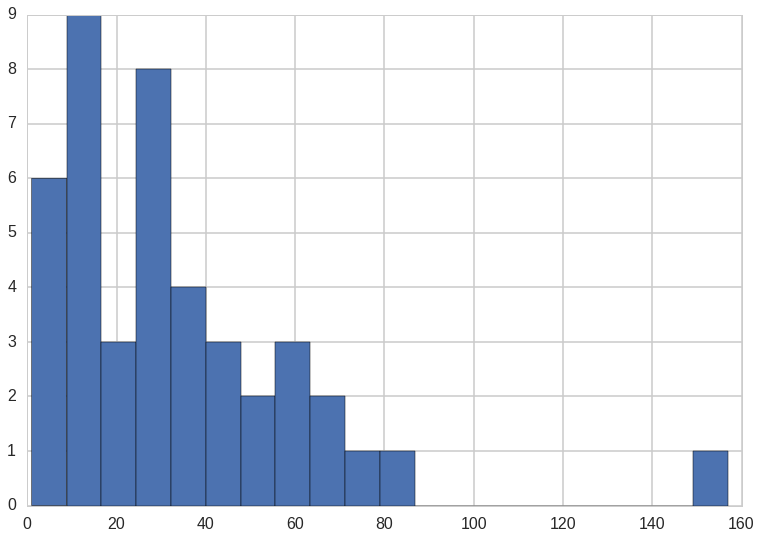

In [119]:
timediffs = df.minute.diff()[1:]
timediffs.hist(bins=20)

The above is a distribution for interarrival times, hence exponential by model..
get the lambda value for this


In [120]:
lambda_from_mean = 1./timediffs.mean()
print(lambda_from_mean,1./lambda_from_mean) # expected value

0.0300699300699 33.2558139535


Next, thats right, plot the exponential distribution with above calculated lambda and also 
plot the hist of timediffs

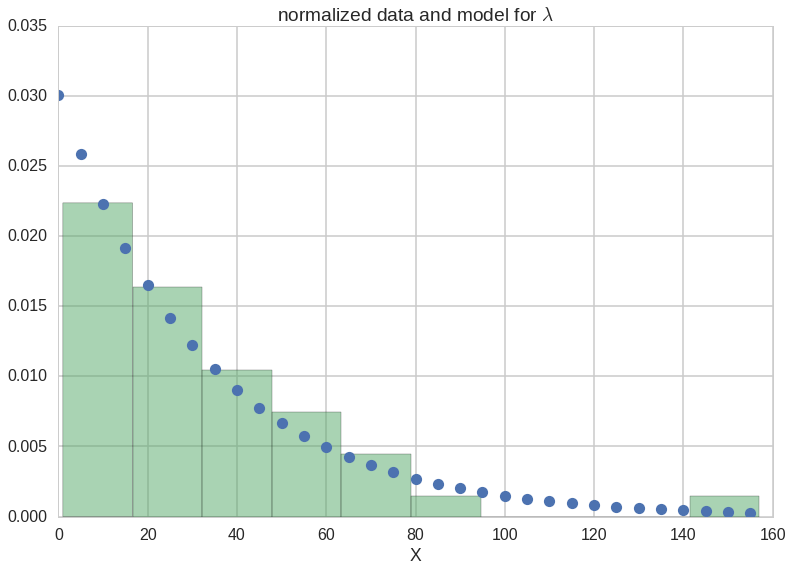

In [122]:
rv = expon(scale=1./lambda_from_mean)
minutes = np.arange(0,160,5) # random values
plt.plot(minutes,rv.pdf(minutes),'o')
timediffs.hist(normed=True,alpha=0.5)
plt.xlabel("X")
plt.title("normalized data and model for $\lambda$")

In [130]:
per_hour = df.minute // 60
num_births_per_hour=df.groupby(per_hour).minute.count()
num_births_per_hour

minute
0         1
1         3
2         1
4         4
7         2
8         2
9         1
10        3
11        1
12        2
13        1
14        4
15        1
16        2
17        1
18        3
19        4
20        3
21        2
22        1
23        2
dtype: int64

In [131]:
num_births_per_hour.mean()

2.0952380952380953

In [132]:
start= np.zeros((2,3),dtype=int)
start

array([[0, 0, 0],
       [0, 0, 0]])

In [141]:
start[1:] = 4

In [142]:
start

array([[0, 0, 0],
       [4, 4, 4]])

In [143]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [144]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [151]:
bernoulli(1).rvs(4)

array([1, 1, 1, 1])

In [153]:
sample_means = [make_throws(200,i) for i in range(1,100)]

In [154]:
mean_of_means = [np.mean(mean) for mean in sample_means]

(0.48, 0.52)

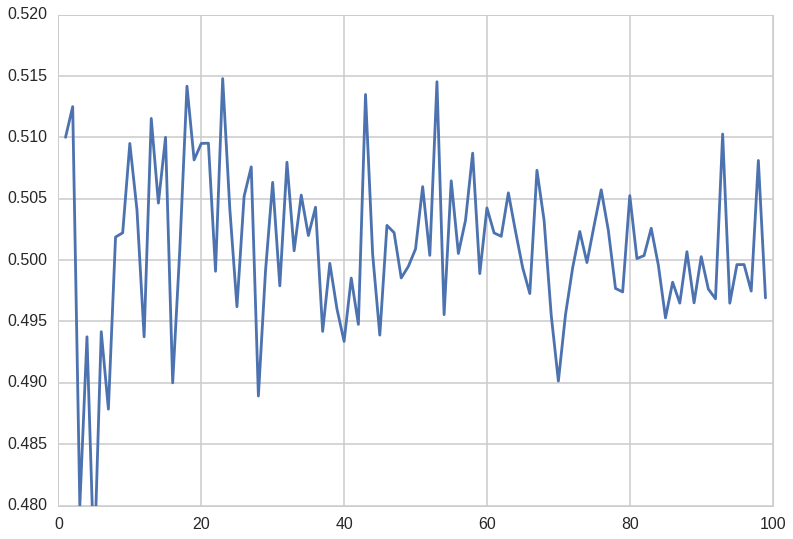

In [156]:
plt.plot(np.arange(1,100,1),mean_of_means)
plt.ylim([0.48,0.52])